## Colors in Context

- Paper: Monroe, Will, et al. "Colors in context: A pragmatic neural model for grounded language understanding." Transactions of the Association for Computational Linguistics 5 (2017): 325-338.
- Link to paper: https://aclanthology.org/Q17-1023/
- Link to code and data: https://github.com/futurulus/colors-in-context


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import colorsys
import matplotlib.pyplot as plt

In [3]:
cic_df = pd.read_csv("./data/cic_vectorized.csv")

In [4]:
cic_df.head(4)

,Unnamed: 0,gameid,roundid,round_num,lux_difficulty_label,lux_difficulty_rating,condition,lux_label,matcher_succeeded,split,target,alt1,alt2,clicked,full_text,utterance_events,num_utterances,utterance_events_pattern
0,0,1124-1,1124-1+1,1,single-utterance-partial-match,2,close,darker blue,False,train,"(0.6277777777777778, 0.81, 0.5)","(0.6888888888888889, 0.92, 0.5)","(0.7861111111111111, 0.87, 0.5)",alt1,"[{""text"": ""The darker blue one"", ""subject"": {""...","[{'text': 'The darker blue one', 'subject': {'...",1,S
1,1,1124-1,1124-1+2,2,single-utterance-full-match,0,far,purple,True,train,"(0.6916666666666667, 0.25, 0.5)","(0.15, 0.53, 0.5)","(0.35833333333333334, 0.66, 0.5)",target,"[{""text"": ""purple"", ""subject"": {""worker_id"": 2...","[{'text': 'purple', 'subject': {'worker_id': 2...",1,S
2,2,1124-1,1124-1+3,3,mulitple-utterances-full-match,1,close,medium pink,False,train,"(0.8361111111111111, 0.57, 0.5)","(0.8083333333333333, 0.59, 0.5)","(0.8388888888888889, 0.86, 0.5)",alt1,"[{""text"": ""Medium pink"", ""subject"": {""worker_i...","[{'text': 'Medium pink', 'subject': {'worker_i...",2,SS
3,3,1124-1,1124-1+4,4,single-utterance-full-match,0,split,lime,False,train,"(0.24166666666666667, 0.66, 0.5)","(0.2361111111111111, 0.21, 0.5)","(0.8305555555555556, 0.29, 0.5)",alt1,"[{""text"": ""lime"", ""subject"": {""worker_id"": 201...","[{'text': 'lime', 'subject': {'worker_id': 201...",1,S


In [12]:
def plot_one(color_vector, ax=None, title=""):
    
    rgb_vector = colorsys.hsv_to_rgb(*color_vector)
    if ax is None:
        _, ax = plt.subplots(1, 1)
    ax.add_patch(plt.Rectangle((0, 0), 10, 10, color=tuple(rgb_vector)))
    ax.axis('off')
    ax.set_title(title)

def plot_grid(objlist, ax=None, title=""):
    
    rgbs = []
    for d in objlist:
        rgbs.append(colorsys.hsv_to_rgb(*d))
        
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(3, 3),
                        subplot_kw={'xticks': [], 'yticks': []})
    for i,ax in enumerate(axs.flat):
        ax.add_patch(plt.Rectangle((0, 0), 10, 10, color=tuple(rgbs[i])))
    plt.show()

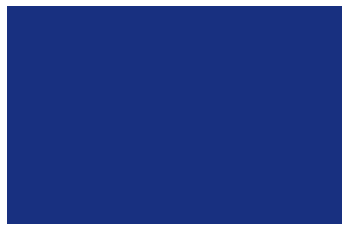

In [6]:
plot_one(eval(cic_df.iloc[0]['target']))

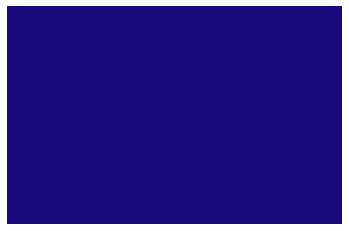

In [7]:
plot_one(eval(cic_df.iloc[0]['alt1']))

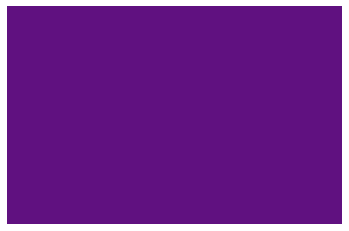

In [8]:
plot_one(eval(cic_df.iloc[0]['alt2']))

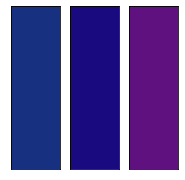

In [13]:
plot_grid([eval(cic_df.iloc[0]['target']),eval(cic_df.iloc[0]['alt1']),eval(cic_df.iloc[0]['alt2'])])